<a href="https://colab.research.google.com/github/ayushpandeyofficial/Waste_Classification_using-CNN/blob/main/Waste_calssification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#cd /content/drive/MyDrive/ColabNotebooks/waste

/content/drive/MyDrive/ColabNotebooks/waste


In [ ]:
#!unzip /content/drive/MyDrive/ColabNotebooks/waste/Waste.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [ ]:
#Importing libraries

import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# import os
# Ignore the warning.
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#image data generators for training and validation.
num_classes = 2
img_rows, img_cols = 150, 150
batch_size = 16
epochs = 25

#from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/drive/MyDrive/ColabNotebooks/waste/DATASET/TRAIN'
validation_data_dir = '/content/drive/MyDrive/ColabNotebooks/waste/DATASET/TEST'

#The generators apply a rescale transformation to the images and fill any gaps using the 'reflect' method.
# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 

#image data generators for training and validation.
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
print("Train/Validation indicies: ", train_generator.class_indices)
print("\n0 Stands for Organic \"O\", and 1 stands for Non-Organic \"R\"")

Train/Validation indicies:  {'O': 0, 'R': 1}

0 Stands for Organic "O", and 1 stands for Non-Organic "R"


In [ ]:
model = Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))



model.add(Dense(num_classes))
model.add(Activation('softmax'))



print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 activation_16 (Activation)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 activation_17 (Activation)  (None, 75, 75, 64)        0         
                                                      

In [ ]:
# initiate RMSprop optimizer and configure some parameters
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
from tensorflow.keras.optimizers import Nadam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                      
checkpoint = ModelCheckpoint("/content/drive/MyDrive/ColabNotebooks/waste/DATASET/waste.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
                                    
    
earlystop = EarlyStopping(monitor = 'val_loss', #value being monitored for improvement
                          min_delta = 0.001,  #Abs value and is the main change required before we stop
                          patience = 10, #no of epocs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keep the best weigts once stopped

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 10,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Nadam',#(lr = 0.001),   #lr= learning rate
              metrics = ['accuracy'])

nb_train_samples = 22564  
nb_validation_samples = 2513  
epochs = 20

#Training
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/20
1410/1410 [==============================] - ETA: 0s - loss: 0.4880 - accuracy: 0.7796
Epoch 1: val_loss improved from inf to 0.35853, saving model to /content/drive/MyDrive/ColabNotebooks/waste/DATASET/waste.h5
1410/1410 [==============================] - 253s 136ms/step - loss: 0.4880 - accuracy: 0.7796 - val_loss: 0.3585 - val_accuracy: 0.8746 - lr: 0.0010
Epoch 2/20
1410/1410 [==============================] - ETA: 0s - loss: 0.4087 - accuracy: 0.8258
Epoch 2: val_loss improved from 0.35853 to 0.33155, saving model to /content/drive/MyDrive/ColabNotebooks/waste/DATASET/waste.h5
1410/1410 [==============================] - 190s 135ms/step - loss: 0.4087 - accuracy: 0.8258 - val_loss: 0.3315 - val_accuracy: 0.8706 - lr: 0.0010
Epoch 3/20
1410/1410 [==============================] - ETA: 0s - loss: 0.3816 - accuracy: 0.8392
Epoch 3: val_loss improved from 0.33155 to 0.30475, saving model to /content/drive/MyDrive/ColabNotebooks/waste/DATASET/waste.h5
1410/1410 [============

In [ ]:
history.history

{'loss': [0.48800432682037354,
  0.4087022840976715,
  0.38161638379096985,
  0.36152368783950806,
  0.3494562804698944,
  0.33523717522621155,
  0.3298386335372925,
  0.32213878631591797,
  0.31789323687553406,
  0.3167429566383362,
  0.3115682005882263,
  0.30882754921913147,
  0.3050287067890167,
  0.3070458173751831,
  0.2999815344810486,
  0.29235509037971497,
  0.28946810960769653,
  0.2930653393268585,
  0.2888760566711426,
  0.29049184918403625],
 'accuracy': [0.7796257138252258,
  0.8257938623428345,
  0.8392318487167358,
  0.8500088453292847,
  0.8560848236083984,
  0.8622050881385803,
  0.8667287826538086,
  0.8690792918205261,
  0.8725829124450684,
  0.8704541325569153,
  0.8746230006217957,
  0.8760422468185425,
  0.8743125796318054,
  0.8778605461120605,
  0.8806102275848389,
  0.8812311291694641,
  0.883049488067627,
  0.8836260437965393,
  0.883049488067627,
  0.8838477730751038],
 'val_loss': [0.35852834582328796,
  0.3315489590167999,
  0.3047502040863037,
  0.2781270

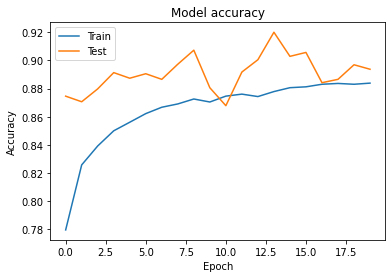

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



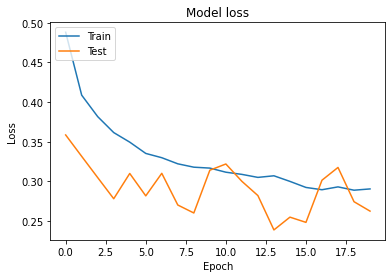

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Displaying our Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib
from keras.models import load_model
#Confution Matrix and Classification Report
class_labels = {0:'O', 1:'R'}


Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1) # put classifier not model
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))





Confusion Matrix
[[1370   31]
 [ 236  876]]
Classification Report
              precision    recall  f1-score   support

           O       0.85      0.98      0.91      1401
           R       0.97      0.79      0.87      1112

    accuracy                           0.89      2513
   macro avg       0.91      0.88      0.89      2513
weighted avg       0.90      0.89      0.89      2513



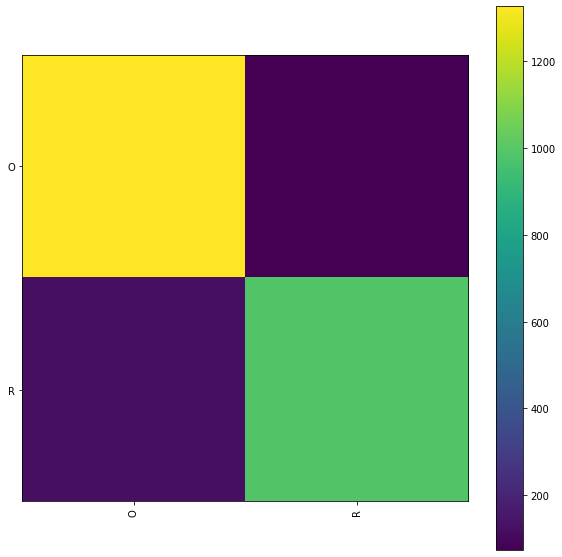

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 150,150,3
model = load_model('/content/drive/MyDrive/ColabNotebooks/waste/DATASET/waste.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 22564
nb_validation_samples = 2513

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(10,10))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [ ]:
#Testing
model.load_weights('/content/drive/MyDrive/ColabNotebooks/waste/DATASET/waste.h5')
model.evaluate(validation_generator);

158/158 [==============================] - 8s 47ms/step - loss: 0.2387 - accuracy: 0.9200


1/1 [==============================] - 7s 7s/step
[[0. 1.]]
this is Non-degradable


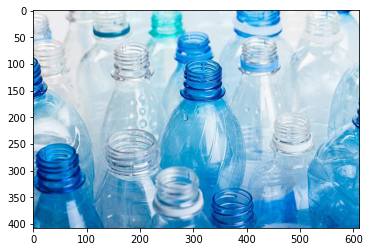

In [2]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img


#Testing out Images
image_path = '/content/drive/MyDrive/try/istockphoto-585288480-612x612.jpg'


model = tensorflow.keras.models.load_model('/content/drive/MyDrive/final_model.h5')
test_image = load_img(image_path,target_size = (150,150,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
print(result)
if result[0][0] == 1:
  print("This is Biodegradable ")
else:
  print("this is Non-degradable")
  # reading the image
testImage = img.imread(image_path)
 
# displaying the modified image
plt.imshow(testImage)